# Basic Intro to Machine Learning - Classification
Using the The Ames Housing dataset compiled by Dean De Cock.

In this notebook, we will look at how to apply clustering.

In [2]:
# Import necessary packages

# Pandas to handle the data
import pandas as pd

# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context('notebook')

# Scipy for linear regression
import scipy

# SciKit-Learn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Load data

In [3]:
included_columns = ['SalePrice','LotArea','BldgType','HouseStyle',
                    'OverallCond','YearBuilt','RoofMatl','GrLivArea',
                    'Fireplaces','GarageArea','PoolArea','MiscVal']

data = pd.read_csv('data/housing_data.csv', usecols = included_columns)

data

,LotArea,BldgType,HouseStyle,OverallCond,YearBuilt,RoofMatl,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
0,8450,1Fam,2Story,5,2003,CompShg,1710,0,548,0,0,208500
1,9600,1Fam,1Story,8,1976,CompShg,1262,1,460,0,0,181500
2,11250,1Fam,2Story,5,2001,CompShg,1786,1,608,0,0,223500
3,9550,1Fam,2Story,5,1915,CompShg,1717,1,642,0,0,140000
4,14260,1Fam,2Story,5,2000,CompShg,2198,1,836,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1Fam,2Story,5,1999,CompShg,1647,1,460,0,0,175000
1456,13175,1Fam,1Story,6,1978,CompShg,2073,2,500,0,0,210000
1457,9042,1Fam,2Story,9,1941,CompShg,2340,2,252,0,2500,266500
1458,9717,1Fam,1Story,6,1950,CompShg,1078,0,240,0,0,142125


## Feature Engineering

### One-hot encoding

In [6]:
categorical_variables = ['BldgType', 'HouseStyle','RoofMatl']

data = pd.get_dummies(data = data, columns = categorical_variables)

data

,LotArea,OverallCond,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice,BldgType_1Fam,...,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,8450,5,2003,1710,0,548,0,0,208500,1,...,0,0,0,1,0,0,0,0,0,0
1,9600,8,1976,1262,1,460,0,0,181500,1,...,0,0,0,1,0,0,0,0,0,0
2,11250,5,2001,1786,1,608,0,0,223500,1,...,0,0,0,1,0,0,0,0,0,0
3,9550,5,1915,1717,1,642,0,0,140000,1,...,0,0,0,1,0,0,0,0,0,0
4,14260,5,2000,2198,1,836,0,0,250000,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,5,1999,1647,1,460,0,0,175000,1,...,0,0,0,1,0,0,0,0,0,0
1456,13175,6,1978,2073,2,500,0,0,210000,1,...,0,0,0,1,0,0,0,0,0,0
1457,9042,9,1941,2340,2,252,0,2500,266500,1,...,0,0,0,1,0,0,0,0,0,0
1458,9717,6,1950,1078,0,240,0,0,142125,1,...,0,0,0,1,0,0,0,0,0,0


### Min max scale

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[data_scaled.columns] = scaler.fit_transform(data_scaled[data_scaled.columns])
data_scaled

,LotArea,OverallCond,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice,BldgType_1Fam,...,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,0.033420,0.500,0.949275,0.259231,0.000000,0.386460,0.0,0.00000,0.241078,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.038795,0.875,0.753623,0.174830,0.333333,0.324401,0.0,0.00000,0.203583,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046507,0.500,0.934783,0.273549,0.333333,0.428773,0.0,0.00000,0.261908,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.038561,0.500,0.311594,0.260550,0.333333,0.452750,0.0,0.00000,0.145952,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.060576,0.500,0.927536,0.351168,0.333333,0.589563,0.0,0.00000,0.298709,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.030929,0.500,0.920290,0.247362,0.333333,0.324401,0.0,0.00000,0.194556,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.055505,0.625,0.768116,0.327619,0.666667,0.352609,0.0,0.00000,0.243161,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.036187,1.000,0.500000,0.377920,0.666667,0.177715,0.0,0.16129,0.321622,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.039342,0.625,0.565217,0.140166,0.000000,0.169252,0.0,0.00000,0.148903,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## K Means

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [38]:
k_means = KMeans(n_clusters=9, random_state=42)
k_means.fit(data_scaled)

KMeans(n_clusters=9, random_state=42)

In [41]:
# In the case of K-Means, the cluster centers *are* the feature means - that's how K-Means is defined! Sweet!
clusters = scaler.inverse_transform(k_means.cluster_centers_)

clusters  = pd.DataFrame(clusters)

clusters.columns = data_scaled.columns

clusters.round(0).sort_values(by='SalePrice', ascending=False).transpose()

,0,4,1,7,5,2,6,8,3
LotArea,11742,5405,11313,10955,9178,11442,2391,4531,10622
OverallCond,6,5,6,6,6,6,5,5,5
YearBuilt,1981,1999,1972,1974,1942,1936,1986,1969,1966
GrLivArea,1979,1313,1299,1393,1456,1550,1276,1409,1519
Fireplaces,1,1,1,1,1,1,0,0,0
GarageArea,548,496,479,480,406,347,355,381,447
PoolArea,6,-0,1,22,0,-0,0,0,0
MiscVal,22,-0,52,20,8,62,-0,78,159
SalePrice,226940,199785,175413,169168,150740,143107,135912,133839,133773
BldgType_1Fam,1,-0,1,1,1,1,0,-0,0


## Hyperparameter tuning

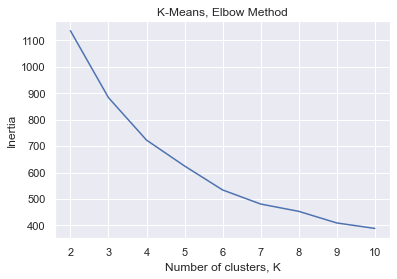

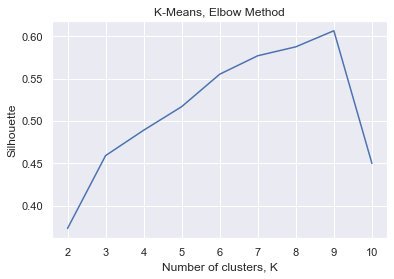

In [30]:
X = data_scaled

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");